In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage import io
from keras.utils import to_categorical

#data early info
#num of images of Cyclone = 927, Earthquake = 1350, FLood = 1074 and Wildfire = 1077

Using TensorFlow backend.


In [2]:
def my_resize(image):
    return cv2.resize(image,(120,120))

In [3]:
def create_data(DATA_DIR,Categories):
    _data = []
    for category in Categories:
        path = os.path.join(DATA_DIR, category) #path to pos or neg directory
        print(path)
        class_label = Categories.index(category)
        print(class_label)
        for img in os.listdir(path):
                image = io.imread(os.path.join(path,img),as_gray=False)
                #print(os.path.join(path,img))   
                new_image =  my_resize(image) #resizing them all to be in same dimension
                _data.append([new_image,class_label])
    return _data

In [4]:
Data_Dir = "F:/PG (MSCS-9)/Computer Vision/Assignemnt/3_/dataset/Cyclone_Wildfire_Flood_Earthquake_Database"

Categories = ["Cyclone","Earthquake","FLood","Wildfire"]
print("preparing data")
myData = create_data(Data_Dir, Categories)

preparing data
F:/PG (MSCS-9)/Computer Vision/Assignemnt/3_/dataset/Cyclone_Wildfire_Flood_Earthquake_Database\Cyclone
0
F:/PG (MSCS-9)/Computer Vision/Assignemnt/3_/dataset/Cyclone_Wildfire_Flood_Earthquake_Database\Earthquake
1
F:/PG (MSCS-9)/Computer Vision/Assignemnt/3_/dataset/Cyclone_Wildfire_Flood_Earthquake_Database\FLood
2
F:/PG (MSCS-9)/Computer Vision/Assignemnt/3_/dataset/Cyclone_Wildfire_Flood_Earthquake_Database\Wildfire
3


In [5]:
#print(myData[0:3]) #prints first three images

#print(myData[0][1]) #prints label of first image
#print(myData[4000][1]) #prints label of 4000th image
print(len(myData))

4428


In [6]:
import random
random.shuffle(myData)
print("data shuffeled")

data shuffeled


Visualizing data after shuffling


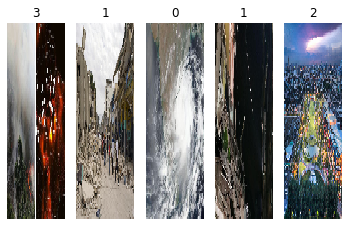

In [7]:
#Visualizing whole data --> shuffled images
print("Visualizing data after shuffling")
i=1
for sample in myData[:5]:
    plt.subplot(1,5,i)
    plt.title(str(sample[1]))
    plt.imshow(sample[0],aspect='3.4')
    plt.axis('off')
    i=i+1
plt.show()

In [8]:
data_img=[]
data_label=[]
for image_array, label in myData:
    data_img.append(image_array)
    data_label.append(label)
    
print(len(data_img))
print(len(data_label))
print("Shape of single Training image"+ str(data_img[0].shape))

4428
4428
Shape of single Training image(120, 120, 3)


In [9]:
#Normalize image pixels between 0 and 1
#data_img[:] = [x / 255 for x in data_img]
#print(data_img[0])

In [10]:
#import pickle
#pickle_out = open("data_img.pickle","wb")
#pickle.dump(data_img, pickle_out)
#pickle_out.close()

#pickle_out = open("data_label.pickle","wb")
#pickle.dump(data_label, pickle_out)
#pickle_out.close()

In [11]:
#pickle_in = open("data_img.pickle","rb")
#data_img = pickle.load(pickle_in)

#pickle_in = open("data_label.pickle","rb")
#data_label = pickle.load(pickle_in)

In [12]:
from sklearn.model_selection import train_test_split

#spliting whole data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(data_img, data_label, test_size=0.2, random_state=42)
#spliting training data into training and validating
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=84)


print(Y_train[0])

3


Visualizing Training examples


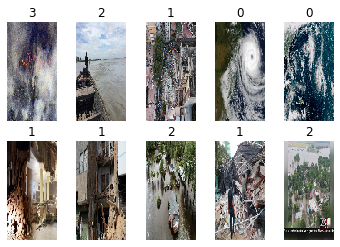

In [13]:
print("Visualizing Training examples")
i=1
for sample in X_train[:10]:
    plt.subplot(2,5,i)
    plt.imshow(X_train[(i-1)*10], interpolation='nearest', aspect='2') #,aspect='3.4')
    plt.title(Y_train[(i-1)*10])
    plt.axis('off')
    i=i+1
plt.show()

In [15]:
#Reshaping X data

X_train = np.array(X_train).reshape(-1,120,120,3)
np.save("./data/X_train.npy",X_train)
print("X_train Reshaped "+ str(X_train.shape))

X_val = np.array(X_val).reshape(-1,120,120,3)
print("X_val Reshaped "+ str(X_val.shape))
np.save("./data/X_val.npy",X_val)

X_test = np.array(X_test).reshape(-1,120,120,3)
print("X_test Reshaped "+ str(X_test.shape))
np.save("./data/X_test.npy",X_test)

X_train Reshaped (3187, 120, 120, 3)
X_val Reshaped (355, 120, 120, 3)
X_test Reshaped (886, 120, 120, 3)


In [16]:
#one-hot encode target column
Y_train = to_categorical(Y_train)
np.save("./data/Y_train.npy",Y_train)

Y_val = to_categorical(Y_val)
np.save("./data/Y_val.npy",Y_val)

Y_test = to_categorical(Y_test)
np.save("./data/Y_test.npy",Y_test)
#Y_train[0]